In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#probably won't need all or most of these but just in case
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import base
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [30]:
#Step 1: import the data
#first the behavioral data--that was easy
behav_df = pd.read_csv('data/connectivityml/unrestricted_pkalra_7_26_2021_17_39_25.csv')
#behav_df.columns
#behav_df.shape

In [130]:
#choose my outcome
mars_df = behav_df[['Subject', 'Mars_Final']]
mars_df.head()

In [75]:
#load the netmats data
netmats_mat = np.loadtxt('data/connectivityml/HCP_PTN1200/netmats/3T_HCP1200_MSMAll_d100_ts2/netmats2.txt')
netmats_mat.shape

In [78]:
#The doc says that the netmats rows correspond to the subjectids in subjectIDs.txt
subject_vec = np.loadtxt('data/connectivityml/HCP_PTN1200/subjectIDs.txt')

In [120]:
#create column names for a new dataframe
newlist = (range(0,10000))

In [121]:
#create the new dataframe
newdf = pd.DataFrame(data = netmats_mat, columns = newlist)

In [131]:
#add the subjectids to the netmats data  
newdf['Subject'] = subject_vec

In [133]:
#Step 2: filter the behavioral data to include only the rows that have netmats ;#make sure the X and Y are in the same order (order by participant ID)
#I did the sorting and dropping in one step using 'merge'
alldata = pd.DataFrame.merge(newdf, mars_df, how = 'left', on='Subject')
#alldata.head()

In [151]:
#it turns out that 5 of the participants that had resting state data DID NOT have Mars scores, so I dropped those
#alldata[alldata['Mars_Final'].isnull()]
alldata = alldata.dropna()

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,Subjects,Subject,Mars_Final
45,0.0,-2.22950,5.5144,-11.9240,0.64044,3.61900,2.134800,2.6874,-0.26645,-2.11260,...,3.5773,5.7898,0.27630,0.549770,1.9415,2.011200,0.0,109830.0,109830.0,NaN
102,0.0,0.23045,16.0080,-8.4005,0.80786,3.94250,1.523000,2.0723,1.16500,-2.33400,...,2.0097,3.9894,1.09050,1.497600,2.2851,2.625900,0.0,123521.0,123521.0,NaN
199,0.0,2.07330,6.3682,-4.9858,-0.99638,1.46550,1.542200,1.4210,2.97560,-0.97535,...,4.6035,2.5641,-0.67743,0.096726,1.7507,0.172560,0.0,144731.0,144731.0,NaN
523,0.0,-0.23623,10.2490,-4.8415,-0.10994,1.05400,0.268780,4.0058,1.86480,-3.29910,...,2.2143,1.8753,0.51275,0.431410,4.0788,-0.011929,0.0,236130.0,236130.0,NaN
768,0.0,-0.10938,9.4727,-4.5355,2.22340,0.89865,-0.013009,1.3596,2.50130,-2.63460,...,2.8303,2.3225,2.05530,0.843440,2.5526,1.100900,0.0,614439.0,614439.0,NaN


In [154]:
#Finally, assign X and y!  Now we're ready to estimate
X = alldata.loc[:,0:9999]
y = alldata['Mars_Final']

In [159]:
#Step 3: Set up and run a model with cross validation
#from sklearn.utils import shuffle
#X_random_order, y_random_order = shuffle(Xt, y, random_state=42)
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

[-41.44016416 -36.77736124  -0.08584749  -0.07482295 -40.14937607]


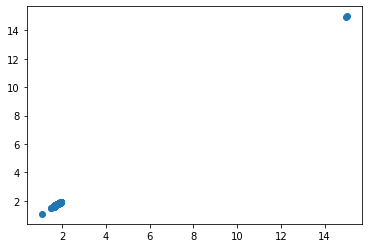

In [164]:
#Look/visualize at the scores
#from sklearn.model_selection import cross_val_score

r2_cv = cross_val_score(est, X, y, cv=5)
print(r2_cv)
#looks like this is a terrible model lol!  But now we have got everything set up and can focus on model tuning and selection.  Choice of outcome could also be important
plt.scatter(y, y_pred)
#that doesn't look right...maybe I should have checked for outliers before estimating? I did notice some weirdly high values in netmats (z scores much greater than 3)